In [141]:
## Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
from sklearn.preprocessing import LabelEncoder

In [142]:
## Reading the notepad file provided, please note in my case absolute path is given, kindly change when trying to execute on
## your system
df=pd.read_csv('D:\ML\Altimetrik_Project\ML_Data\ML_Data.txt',encoding='ANSI',engine='python',sep=',',            
             quoting=3,quotechar='"',escapechar='"',      
                error_bad_lines=False,warn_bad_lines=False)

In [143]:
df.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country\r
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom\r
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom\r
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom\r
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom\r
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom\r


In [144]:
## Renaming the column - Country
df=df.rename(columns={'Country\r':'Country'})

In [145]:
## Removing the \r from the values in the Country field
df['Country']=df['Country'].replace({'\r': ''}, regex=True)

In [146]:
df.head(5)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


## EDA

In [147]:
## Check for Null values
df.isnull().any()

Invoice_Number    False
Product_Code      False
Description        True
Quantity          False
Invoice_Date      False
Unit_Price        False
Customer_ID        True
Country           False
dtype: bool

In [148]:
### Description, Customer Id has Null values
df.isnull().sum()

Invoice_Number         0
Product_Code           0
Description         1454
Quantity               0
Invoice_Date           0
Unit_Price             0
Customer_ID       133391
Country                0
dtype: int64

In [149]:
## There are many Null values in Customer Id, let me check for % of null values
nan_features= [feature for feature in df.columns if df[feature].isnull().sum()>1]

In [150]:
for feature in nan_features:
    print("Nan values in {} is {} % missing".format(feature, np.round(df[feature].isnull().sum()/len(df)*100),4))

Nan values in Description is 0.0 % missing
Nan values in Customer_ID is 25.0 % missing


In [151]:
## Customer Id has almost 25% Null values
df['Description'].isnull().sum()/len(df)

0.0027070653661333834

In [152]:
## Description has almost 0.2% Null values. We will need to impute values in Feature Engineering. 
## Anyways CustomerID needs to be checked as they might not be needed for clustering

In [153]:
## Let me see the stats for the numerical columns
df.describe()

,Quantity,Unit_Price,Customer_ID
count,537113.000000,537113.000000,403722.000000
mean,9.597027,4.630645,15287.768997
std,153.149401,97.190066,1713.989586
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


In [154]:
len(df)

537113

In [155]:
df['Description'].describe()

count                                 535659
unique                                  4151
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: Description, dtype: object

In [156]:
## There are 4K unique products, too many categorical values. maybe need to convert these to vectors using BOW or TfIdf

In [157]:
## Let me plot a Heatmap to view the correlation between the different numerical fields

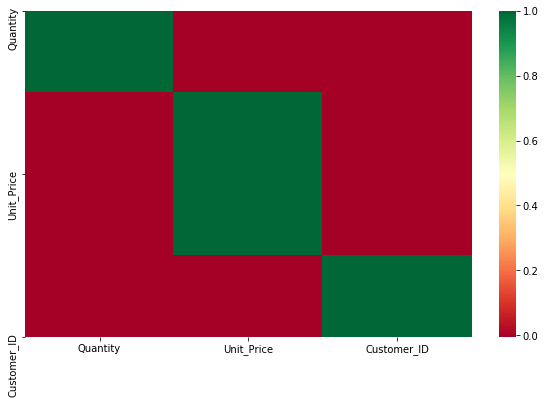

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='RdYlGn')

### There's absolutely no correlation between any of the columns

In [159]:
## I am making a Total Sales column whihc would be the Unit Price * Quantity to get the sales value of each customer
df['Sales'] = df.apply(lambda df: (df['Unit_Price']*df['Quantity']),axis=1)

In [160]:
df.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [161]:
##Total Count of Orders per Country List out of total 500K orders, arranged descending 
((df['Country'].value_counts()/len(df))*100).head(10)

United Kingdom    91.403671
Germany            1.759406
France             1.588493
EIRE               1.515882
Spain              0.468058
Netherlands        0.438641
Belgium            0.383718
Switzerland        0.370872
Portugal           0.281877
Australia          0.233098
Name: Country, dtype: float64

In [162]:
## As we can see that 91% orders are from traders/wholesalers from UK, and then rest of countries has 1% orders. That means 
## UK is the region with whom ABC has maximum trades.

Text(0, 0.5, 'Total Mean Sales/ Country')

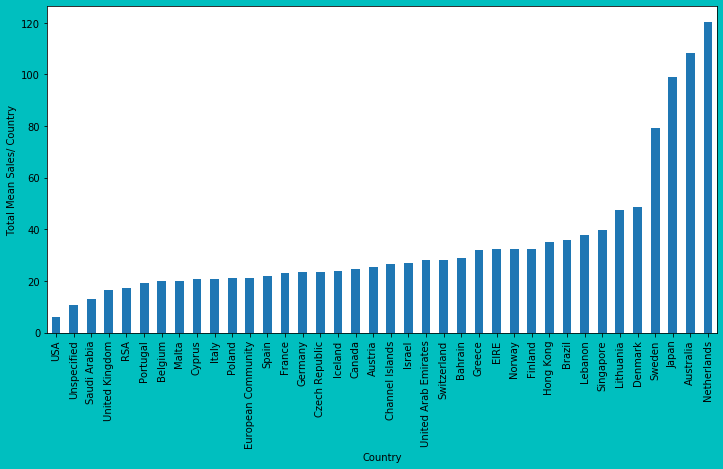

In [163]:
## Let me see the total Sales for each country whom ABC Limited has sold
plt.figure(figsize=(12,6),facecolor='c')
df.groupby('Country')['Sales'].mean().sort_values().plot.bar()
plt.ylabel('Total Mean Sales/ Country')

In [164]:
### As we can see Netherlands, Australia, Japan has the most average Sales per order
## UK is very low. Not able to understand why? we have to check that inspite of all orders being from UK, why UK is 
## last in case of Average Order Sale/ per order. It could be that UK is sold low value orders but many orders whihc brings the 
## average price per order low.

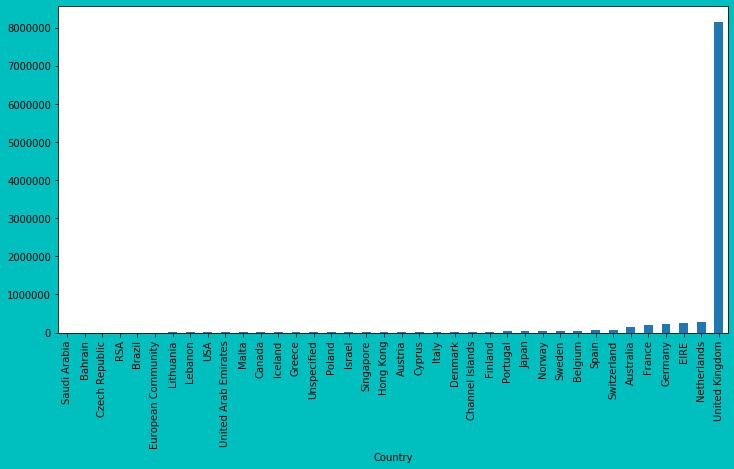

In [165]:
## Taking the sum of Sales per country
plt.figure(figsize=(12,6),facecolor='c')
df.groupby('Country')['Sales'].sum().sort_values().plot.bar()

In [166]:
## As expected the sum of sales are large because UK  accounts for 91% of all orders, that clarifies that UK is being sold 
## very low price and small quantities of orders but MORE orders(by volume)

## So 1 cluster is fixed, High Quantity * Low Price = Multiple orders

In [167]:
df[df['Country']=='United Kingdom'].head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [168]:
obj=df.groupby('Country')['Sales']

In [169]:
obj.aggregate(['mean']).sort_values(by='mean',ascending=False).head(10)

,mean
Country,
Netherlands,120.305883
Australia,108.091206
Japan,98.903029
Sweden,79.246514
Denmark,48.480987
Lithuania,47.458857
Singapore,39.713553
Lebanon,37.641778
Brazil,35.737500


In [170]:
## Let us check for Netherlands
df[df['Country']=='Netherlands'].sort_values(by='Sales',ascending=False)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales
417589,573003,23084,RABBIT NIGHT LIGHT,2400,10/27/2011 12:11,2.08,14646.0,Netherlands,4992.00
530226,581175,23084,RABBIT NIGHT LIGHT,1440,12-07-2011 15:16,1.79,14646.0,Netherlands,2577.60
201932,554642,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,960,5/25/2011 12:19,1.45,14646.0,Netherlands,1392.00
405305,572052,22595,GINGHAM HEART DECORATION,1728,10/20/2011 12:26,0.72,14646.0,Netherlands,1244.16
135425,548011,22630,DOLLY GIRL LUNCH BOX,640,3/29/2011 11:14,1.65,14646.0,Netherlands,1056.00
...,...,...,...,...,...,...,...,...,...
83370,C543388,POST,POSTAGE,-3,02-08-2011 09:44,15.00,14646.0,Netherlands,-45.00
316482,C564899,21787,RAIN PONCHO RETROSPOT,-144,8/31/2011 11:31,0.65,14646.0,Netherlands,-93.60
316480,C564899,M,Manual,-480,8/31/2011 11:31,0.22,14646.0,Netherlands,-105.60
301459,C563593,D,Discount,-1,8/18/2011 6:13,206.40,14646.0,Netherlands,-206.40


In [171]:
## So Netherlands is giving Bulk Orders, more quantities of Products at one go, may be they are wholesalers

## But we have spotted some negative quantities and negative Sales

In [172]:
## Let me check for UK as well
df[df['Country']=='United Kingdom'].sort_values(by='Sales',ascending=False)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales
60865,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.60
220256,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,06-10-2011 15:28,649.50,15098.0,United Kingdom,38970.00
14859,537632,AMAZONFEE,AMAZON FEE,1,12-07-2010 15:08,13541.33,NaN,United Kingdom,13541.33
296813,A563185,B,Adjust bad debt,1,08-12-2011 14:50,11062.06,NaN,United Kingdom,11062.06
171410,551697,POST,POSTAGE,1,05-03-2011 13:46,8142.75,16029.0,United Kingdom,8142.75
...,...,...,...,...,...,...,...,...,...
43260,C540118,AMAZONFEE,AMAZON FEE,-1,01-05-2011 09:57,16453.71,NaN,United Kingdom,-16453.71
43259,C540117,AMAZONFEE,AMAZON FEE,-1,01-05-2011 09:55,16888.02,NaN,United Kingdom,-16888.02
519943,C580605,AMAZONFEE,AMAZON FEE,-1,12-05-2011 11:36,17836.46,NaN,United Kingdom,-17836.46
220257,C556445,M,Manual,-1,06-10-2011 15:31,38970.00,15098.0,United Kingdom,-38970.00


In [173]:
## Yes they have Negative Sales too. 

## Could it be return products/ Amazon Fee i.e some fee is levied, we have to explore this too

In [174]:
## Let me check for 1 of the orders, yes it is same as the order placed, it means the order has been returned, 
## alo the invoice number is different, there could be large number of reverse orders/return orders as well
df[df['Invoice_Number']=='C541433']

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales
60870,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6


## Negative Values of Sales (or return products/billing adjustments/charges levied)

In [175]:
df[df['Sales']<0].sort_values(by='Sales',ascending=True)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales
60870,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.60
220257,C556445,M,Manual,-1,06-10-2011 15:31,38970.00,15098.0,United Kingdom,-38970.00
519943,C580605,AMAZONFEE,AMAZON FEE,-1,12-05-2011 11:36,17836.46,NaN,United Kingdom,-17836.46
43259,C540117,AMAZONFEE,AMAZON FEE,-1,01-05-2011 09:55,16888.02,NaN,United Kingdom,-16888.02
43260,C540118,AMAZONFEE,AMAZON FEE,-1,01-05-2011 09:57,16453.71,NaN,United Kingdom,-16453.71
...,...,...,...,...,...,...,...,...,...
197486,C554100,16235,RECYCLED PENCIL WITH RABBIT ERASER,-1,5/22/2011 13:27,0.21,15555.0,United Kingdom,-0.21
436135,C574524,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,-1,11-04-2011 13:53,0.19,17841.0,United Kingdom,-0.19
325974,C565843,85194S,HANGING SPRING FLOWER EGG SMALL,-1,09-07-2011 12:15,0.19,14606.0,United Kingdom,-0.19
71826,C542256,21883,STARS GIFT TAPE,-1,1/26/2011 17:04,0.19,17722.0,United Kingdom,-0.19


In [176]:
df[df['Sales']<0].count()

Invoice_Number    9227
Product_Code      9227
Description       9227
Quantity          9227
Invoice_Date      9227
Unit_Price        9227
Customer_ID       8843
Country           9227
Sales             9227
dtype: int64

In [177]:
## As you can see there are 9000 Orders with Negative Sales means the total sales has also decreased because of this

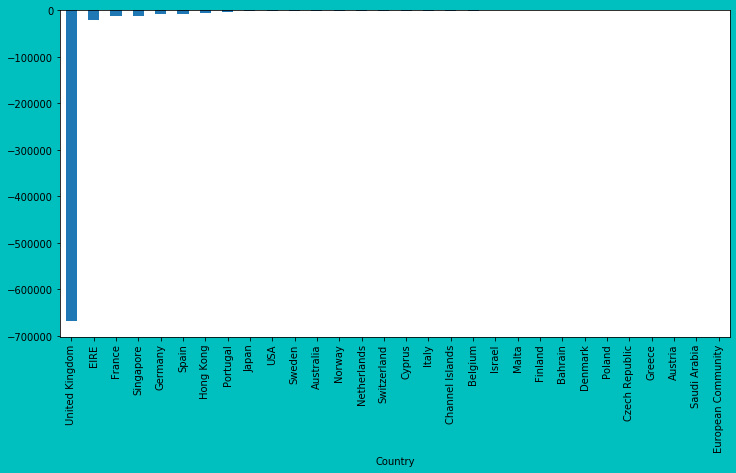

In [178]:
## Let me see from where the Charges/Return orders Sales were maximum
plt.figure(figsize=(12,6),facecolor='c')
df[df['Sales']<0].groupby('Country')['Sales'].sum().sort_values().plot.bar()

In [179]:
## As you can see the Negative SUm of Sales for UK is largest.But inspite of this the sum of positve sales were higher.

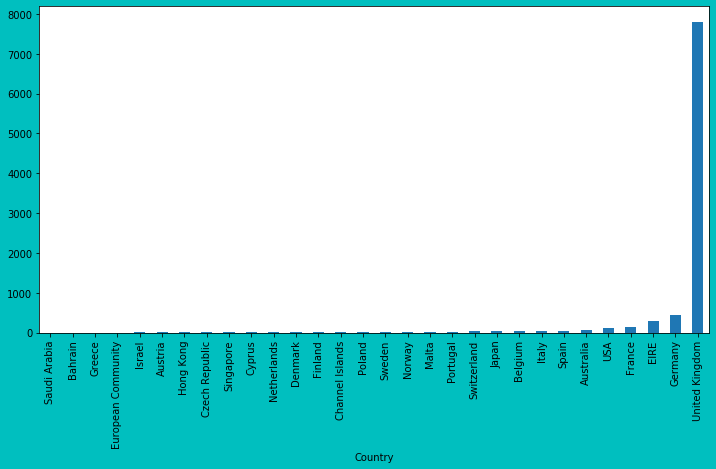

In [180]:
## See the count of return orders per country
plt.figure(figsize=(12,6),facecolor='c')
df[df['Sales']<0].groupby('Country')['Sales'].count().sort_values().plot.bar()

In [181]:
## Let me see which products were maximum returned or what charges were levied maximum
df[(df['Sales']<0) & (df['Country']=='United Kingdom')]['Description'].value_counts()

Manual                                 196
REGENCY CAKESTAND 3 TIER               148
POSTAGE                                 88
Discount                                74
JAM MAKING SET WITH JARS                70
                                      ... 
LUNCH BAG PAISLEY PARK                   1
CHRISTMAS TREE HANGING SILVER            1
PACK OF 20 SPACEBOY NAPKINS              1
ANT SILVER LIME GREEN BOUDICCA RING      1
TUSCAN VILLA DOVECOTE BIRD FEEDER        1
Name: Description, Length: 1781, dtype: int64

In [182]:
## As you can see some Manual Charges were levied, other than that Discount and Postage were other charges whihc were levied

In [183]:
## Let me see for UK which all  charges were levied on what products as UK is our main interest
df[(df['Sales']<0) & (df['Country']=='United Kingdom')][['Description','Sales']].sort_values(by='Sales')

,Description,Sales
60870,MEDIUM CERAMIC TOP STORAGE JAR,-77183.60
220257,Manual,-38970.00
519943,AMAZON FEE,-17836.46
43259,AMAZON FEE,-16888.02
43260,AMAZON FEE,-16453.71
...,...,...
197486,RECYCLED PENCIL WITH RABBIT ERASER,-0.21
436135,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,-0.19
71826,STARS GIFT TAPE,-0.19
325974,HANGING SPRING FLOWER EGG SMALL,-0.19


In [184]:
## MEDIUM CERAMIC TOP STORAGE JAR, Manual, AMAZON FEE are the main returned products and charges levied

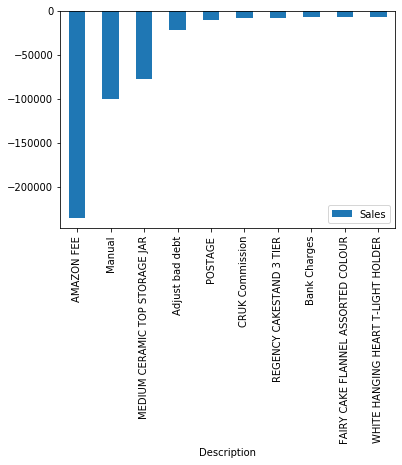

In [185]:
## Let me plot the products whihc has maximum sum of negative sales, they can be used in the future to minimise the losses
df[(df['Sales']<0) & (df['Country']=='United Kingdom')].groupby('Description')['Sales'].sum().sort_values().head(10).plot.bar().legend()

## As you can see above "Amazon Fee, Manual charges and Medium Top Storage" led to decrease in Overall Sales which eroded some of the positive sales for United Kingdom

## Let us see the bifurcation of positive and negative sales for each country

Text(0, 0.5, 'Sum of Negative Sales')

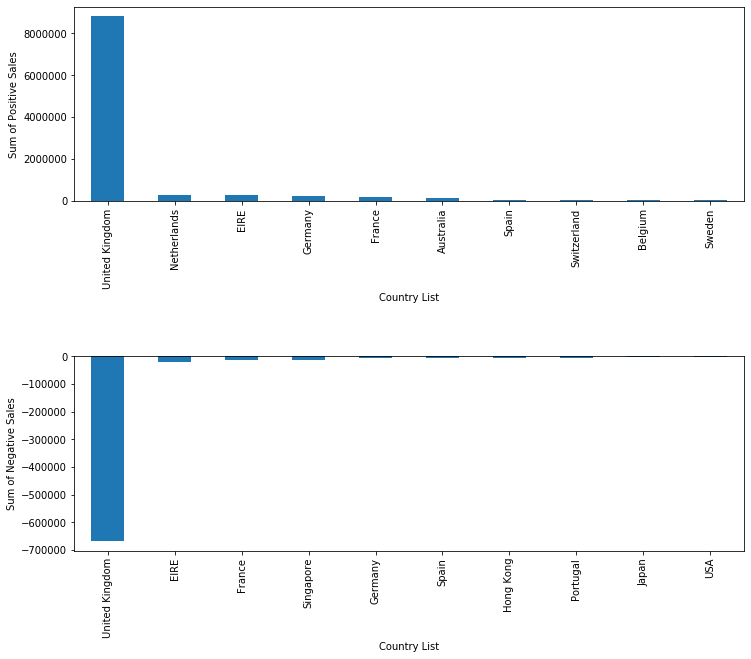

In [186]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
df[df['Sales']>0].groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Country List')
plt.ylabel('Sum of Positive Sales')
plt.subplots_adjust(hspace = .8)
plt.subplot(2,1,2)
df[df['Sales']<0].groupby('Country')['Sales'].sum().sort_values(ascending=True).head(10).plot.bar()
plt.xlabel('Country List')
plt.ylabel('Sum of Negative Sales')

### As you can see UK has both Positive sales and negative Sales, other countries has both low positve and low negative

## Top Categories contributing to Positive Sales

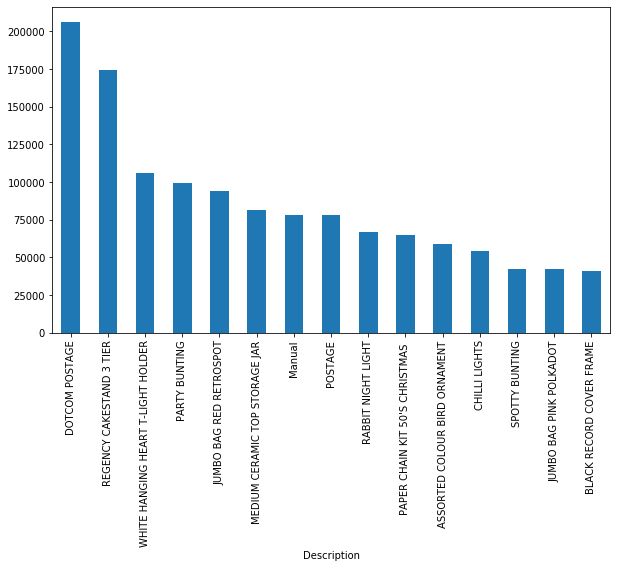

In [187]:
## Let us see the top categories which contribute to the Overall Sum of Sales
plt.figure(figsize=(10,6))
df[df['Sales']>0].groupby('Description')['Sales'].sum().sort_values(ascending=False).head(15).plot.bar()

## Top Categories contributing to Negative Sales

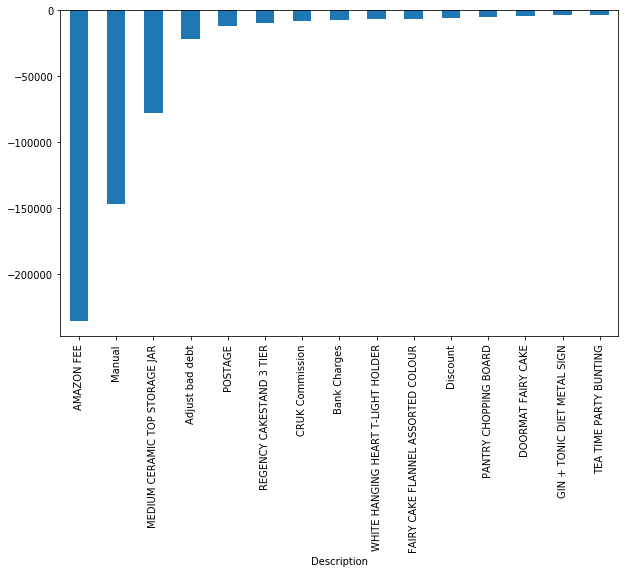

In [188]:
plt.figure(figsize=(10,6))
df[df['Sales']<0].groupby('Description')['Sales'].sum().sort_values(ascending=True).head(15).plot.bar()

In [189]:
positive_sales=pd.DataFrame(df[df['Sales']>0].groupby(['Country','Description'])['Sales'].sum())
positive_sales= positive_sales.reset_index()
positive_sales.sort_values(by='Sales',ascending=False)

,Country,Description,Sales
16534,United Kingdom,DOTCOM POSTAGE,206248.770
18252,United Kingdom,REGENCY CAKESTAND 3 TIER,142273.290
19220,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,100497.720
17822,United Kingdom,PARTY BUNTING,93658.530
17261,United Kingdom,JUMBO BAG RED RETROSPOT,86471.340
...,...,...,...
19558,Unspecified,MAGNETS PACK OF 4 RETRO PHOTO,0.390
10777,Netherlands,PACK OF 12 VINTAGE DOILY TISSUES,0.390
5725,France,BLUE EGG SPOON,0.360
13822,Spain,SMALL YELLOW BABUSHKA NOTEBOOK,0.210


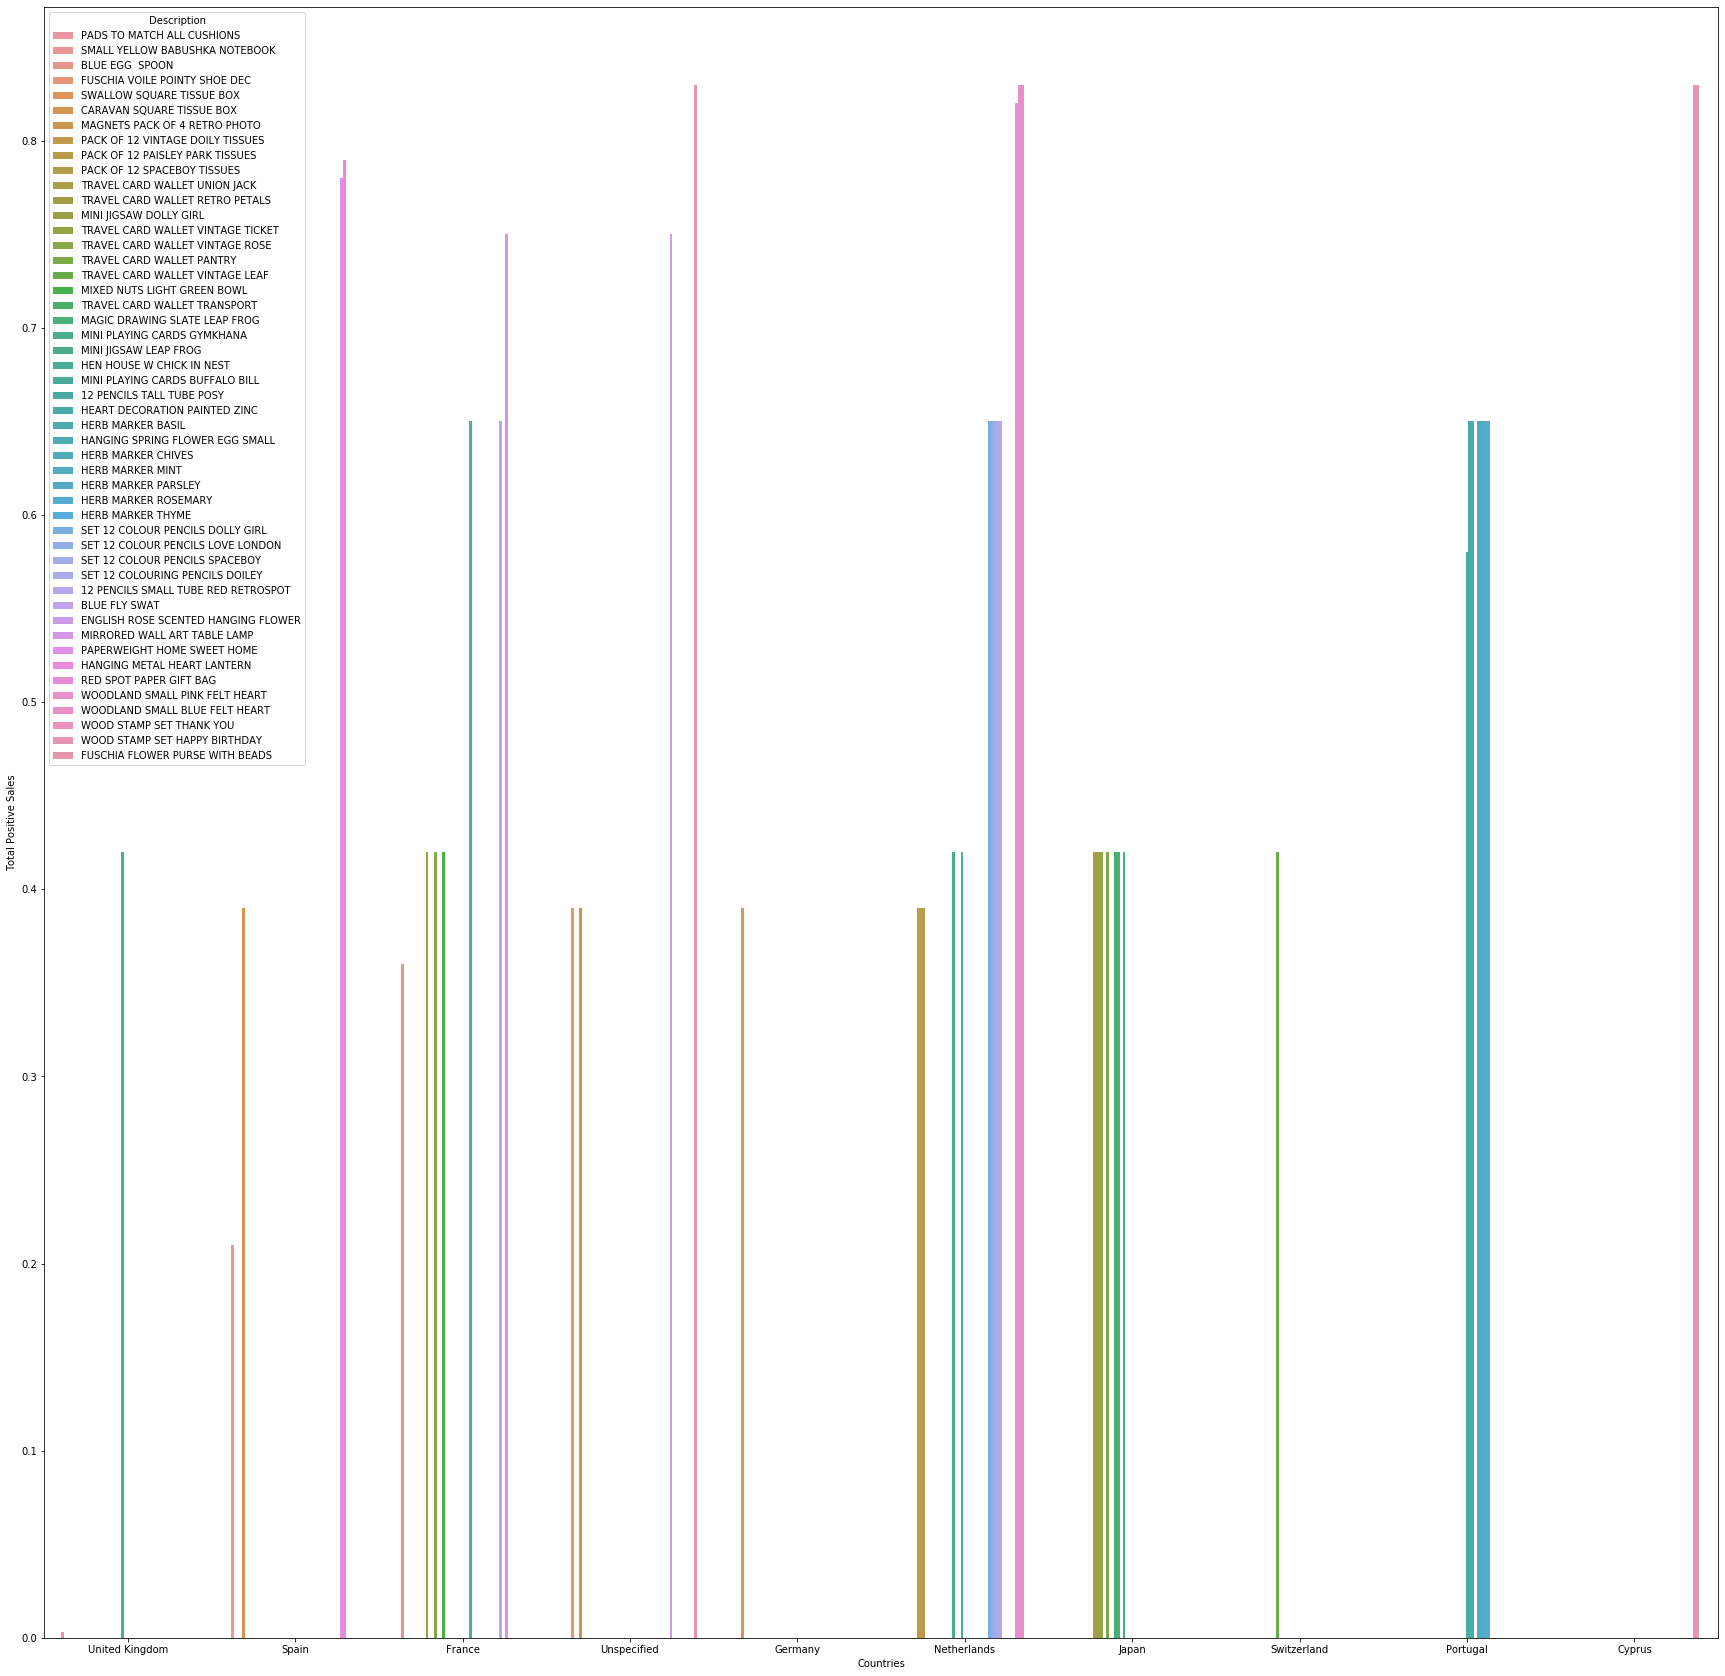

In [190]:
## Country wise Product Sale distribution.
plt.figure(figsize=(30,30))
sns.barplot(x='Country',y='Sales',data=positive_sales.sort_values(by='Sales').head(50),hue='Description')
plt.xlabel('Countries')
plt.ylabel('Total Positive Sales')
plt.show()

In [191]:
## The plot is a bit sketchy as many categories are present.

In [192]:
## Let me check the Product wise distribution of Countries with Negative Sales, Only top 100 distribution is shown

In [193]:
negative_sales=pd.DataFrame(df[df['Sales']<0].groupby(['Country','Description'])['Sales'].sum())
negative_sales= negative_sales.reset_index()
negative_sales.sort_values(by='Sales')

,Country,Description,Sales
1127,United Kingdom,AMAZON FEE,-235281.59
2053,United Kingdom,Manual,-100432.34
1996,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,-77446.31
1167,United Kingdom,Adjust bad debt,-22124.12
864,Singapore,Manual,-12158.90
...,...,...,...
2606,United Kingdom,STRIPY DESIGN SHOWER CAP,-0.29
1677,United Kingdom,FRENCH STYLE STORAGE JAR JAM,-0.29
2268,United Kingdom,RECYCLED PENCIL WITH RABBIT ERASER,-0.21
2591,United Kingdom,STARS GIFT TAPE,-0.19


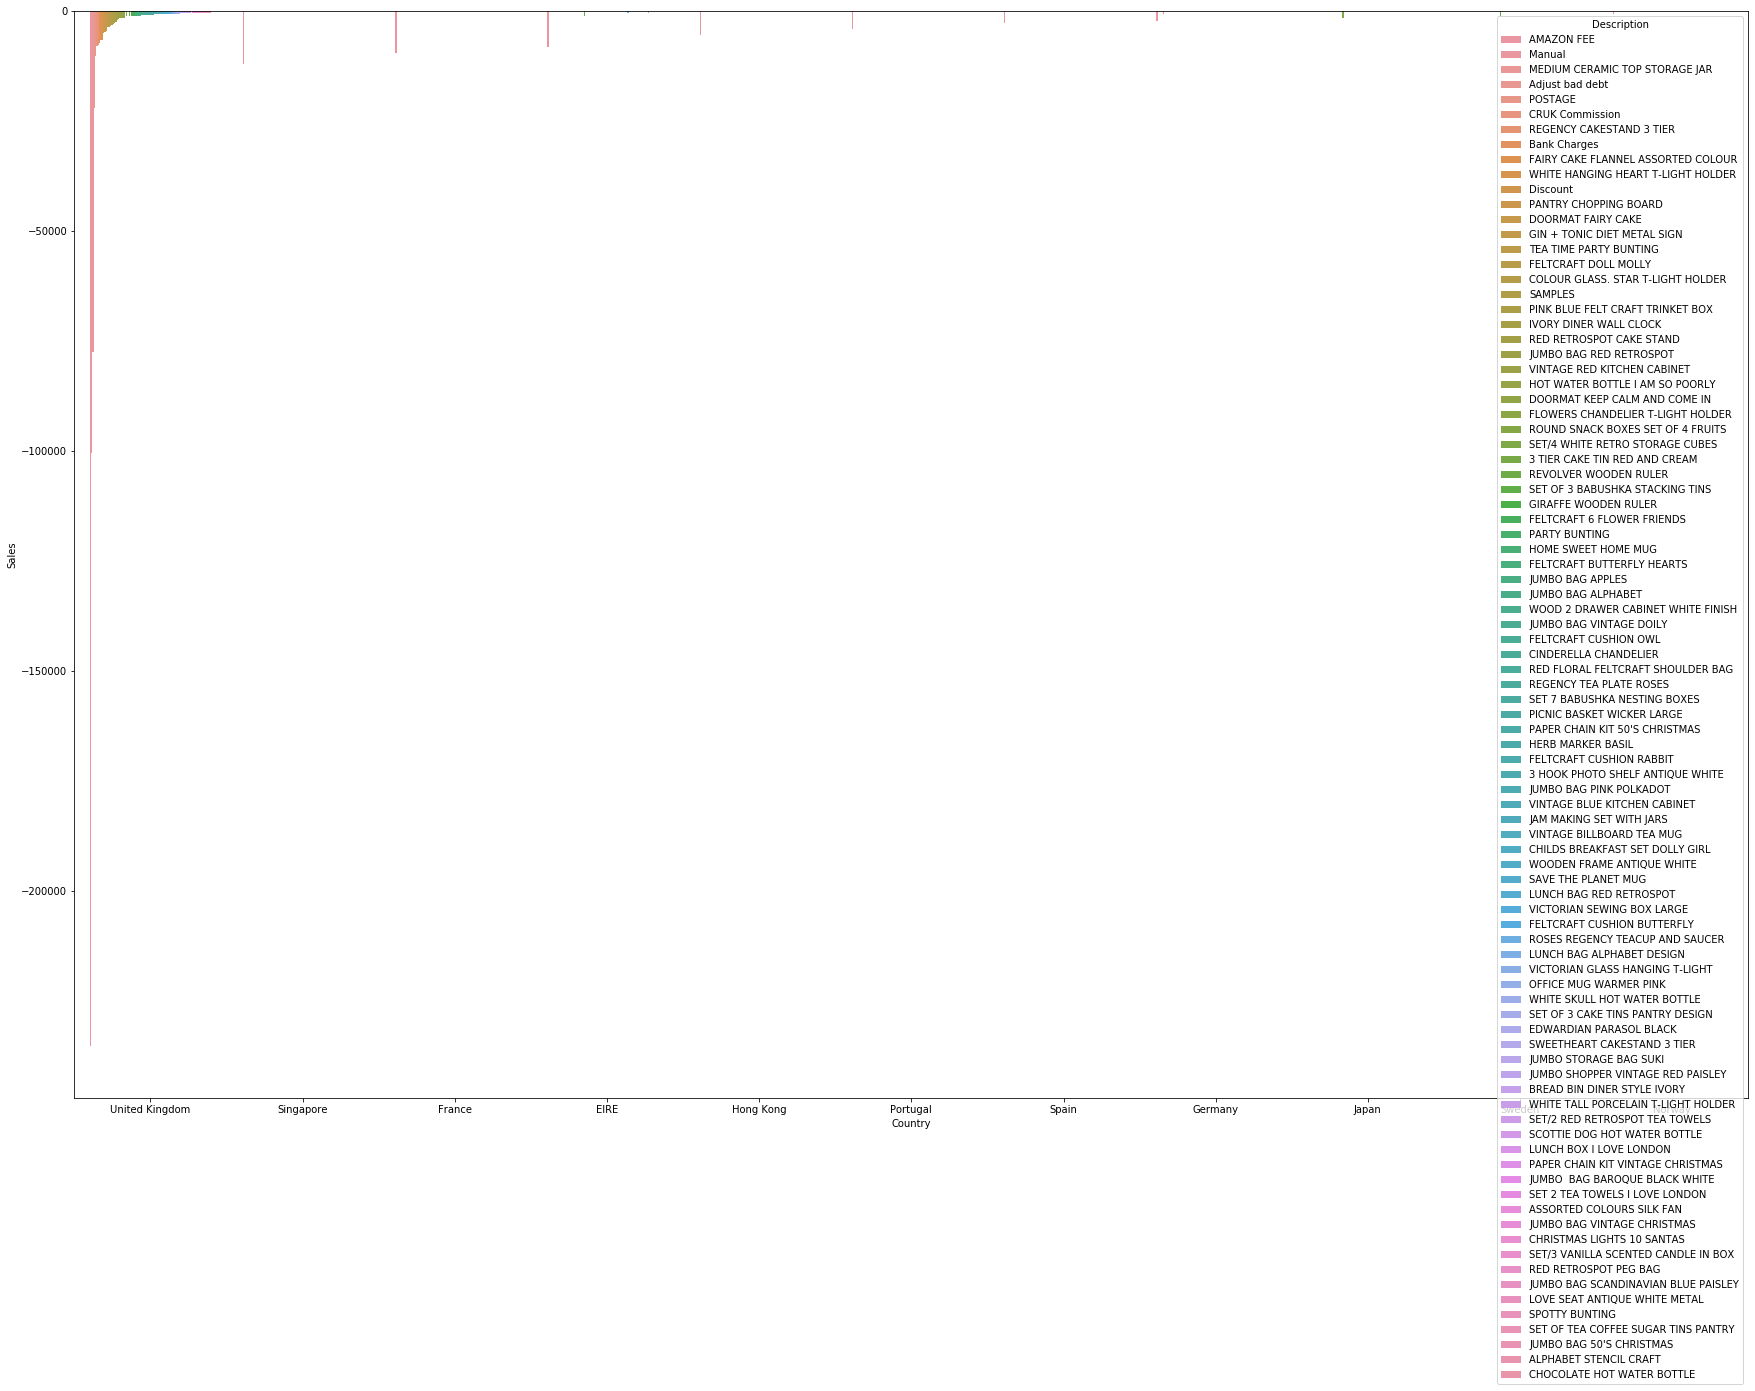

In [194]:
plt.figure(figsize=(30,20))
sns.barplot(x='Country',y='Sales',data=negative_sales.sort_values(by='Sales').head(100),hue='Description')
plt.show()

## Customer and Invoice Number grouping, a customer brought how many products with a single Invoice number

In [195]:
df.groupby(['Invoice_Number','Customer_ID'])['Sales'].count().sort_values(ascending=False).head(20)

Invoice_Number  Customer_ID
576339          14096.0        535
579196          14096.0        526
580727          14096.0        523
578270          14096.0        435
573576          14096.0        426
567656          14096.0        416
567183          14769.0        398
575607          14096.0        369
571441          14096.0        357
570488          14096.0        348
572552          14096.0        346
568346          14096.0        327
547063          14769.0        291
569246          14096.0        281
562031          16984.0        276
554098          14769.0        262
570672          12536.0        259
543040          17337.0        255
569897          17813.0        238
572103          17571.0        223
Name: Sales, dtype: int64

In [196]:
## As we can see Customer Id 14096 had placed 535 orders with Invoice number 576339 and again large quantity of 
## orders with different invoice
df[(df['Invoice_Number']=='576339') & (df['Customer_ID']==14096.00)]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales
462600,576339,10135,COLOURING PENCILS BROWN TUBE,14,11/14/2011 15:27,2.46,14096.0,United Kingdom,34.44
462601,576339,15044A,PINK PAPER PARASOL,1,11/14/2011 15:27,5.79,14096.0,United Kingdom,5.79
462602,576339,16238,PARTY TIME PENCIL ERASERS,2,11/14/2011 15:27,0.42,14096.0,United Kingdom,0.84
462603,576339,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,1,11/14/2011 15:27,0.83,14096.0,United Kingdom,0.83
462604,576339,17003,BROCADE RING PURSE,2,11/14/2011 15:27,0.63,14096.0,United Kingdom,1.26
...,...,...,...,...,...,...,...,...,...
463130,576339,90083,CRYSTAL CZECH CROSS PHONE CHARM,1,11/14/2011 15:27,1.63,14096.0,United Kingdom,1.63
463131,576339,90086,CRYSTAL FROG PHONE CHARM,1,11/14/2011 15:27,1.63,14096.0,United Kingdom,1.63
463132,576339,90119,METALIC LEAVES BAG CHARMS,11,11/14/2011 15:27,2.46,14096.0,United Kingdom,27.06
463133,576339,90166,PINK & WHITE ROSEBUD RING,1,11/14/2011 15:27,4.15,14096.0,United Kingdom,4.15


In [197]:
## He seems to be a bulk customer who buys many items of different items in a single invoice

## Let me check for Dates, who placed orders when i,e the orders were placed regularly or once in a while

In [198]:
## most recent order
df['Invoice_Date'].max()

'9/30/2011 9:45'

In [199]:
## 1st order
df['Invoice_Date'].min()

'01-04-2011 10:00'

## The date formats are different, we have to make all the dates same

In [200]:
df['new_Invoice_Date']=pd.to_datetime(df['Invoice_Date'])

## This new Invoice Date will be the new date and will be used later

In [201]:
df.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [202]:
df[['Invoice_Date','new_Invoice_Date']].max()

Invoice_Date             9/30/2011 9:45
new_Invoice_Date    2011-12-09 12:50:00
dtype: object

In [203]:
df[['Invoice_Date','new_Invoice_Date']].min()

Invoice_Date           01-04-2011 10:00
new_Invoice_Date    2010-12-01 08:26:00
dtype: object

In [204]:
## Checking for the Customer Id- 14096.00
df[(df['Invoice_Number']=='576339') & (df['Customer_ID']==14096.00)]['new_Invoice_Date'].value_counts()

2011-11-14 15:27:00    535
Name: new_Invoice_Date, dtype: int64

In [205]:
## Checking for the Customer Id- 14096.00
df[(df['Invoice_Number']=='570672') & (df['Customer_ID']==12536.00)]['new_Invoice_Date'].value_counts()

2011-10-11 14:52:00    259
Name: new_Invoice_Date, dtype: int64

## So the customers which has the maximum Invoice Numbers and Maximum orders are the customers which have shopped recently

In [206]:
## I have taken the sum of Sales per customer and per invoice, but could not find Customer Id - 12536 and 14096 in the list
## This inspite of these 2 customers placing the maximum number of orders
df.groupby(['Invoice_Number','Customer_ID'])['Sales'].sum().sort_values(ascending=False).head(20)

Invoice_Number  Customer_ID
541431          12346.0        77183.60
556444          15098.0        38970.00
567423          17450.0        31698.16
556917          12415.0        22775.93
572209          18102.0        22206.00
567381          17450.0        22104.80
563614          12415.0        21880.44
550461          15749.0        21535.90
572035          14646.0        20226.08
563076          14646.0        19150.66
562439          12931.0        18841.48
541220          14156.0        16774.72
556255          18102.0        16488.00
545475          12415.0        16216.84
537659          18102.0        15885.49
569650          12415.0        15643.77
548011          14646.0        15581.32
540815          15749.0        15160.90
552883          14646.0        14415.74
569570          16684.0        13760.02
Name: Sales, dtype: float64

In [207]:
## Hence tries to find out the sum of sales for these 2 customers, see that the sum of Sales is very low. It means 
## there must be some negative sales/ charges levied on these customers/ or these are low value customers i.e 
## the prices and the quantities are very low for individual orders whcih does not increase the overall Sales amount
df[(df['Invoice_Number']=='576339') & (df['Customer_ID']==14096.00)]['Sales'].sum()

8350.349999999999

In [208]:
df[(df['Invoice_Number']=='576339') & (df['Customer_ID']==14096.00)]['Sales'].min()

0.83

In [209]:
## Same for this customer as well. So the number of orders placed for these type of customer are very large, however the
## total sales generated by selling them is very low.
df[(df['Invoice_Number']=='570672') & (df['Customer_ID']==12536.00)]['Sales'].sum()

4279.71

### Therefore these 2 customers are like many customers who placed huge quantities of orders but the total values of the order size was very less as we can see, the sum of all order placed in 1 invoice is 8350 which is very less compared to other sellers which bought less quantity but high value products. 
## But these sellers bought very frequently and the overall sales generated are very low

In [210]:
df[(df['Invoice_Number']=='541431') & (df['Customer_ID']==12346.00)]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date
60865,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6,2011-01-18 10:01:00


In [211]:
df[(df['Invoice_Number']=='556444') & (df['Customer_ID']==15098.00)]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date
220256,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,06-10-2011 15:28,649.5,15098.0,United Kingdom,38970.0,2011-06-10 15:28:00


### Also he placed the order on 18-Jan-2011 whcih is like 9 months away from the latest orders placed (09-Dec-2011)
### Also the order quantity has been very large signifying that the customer is a big wholesale customer who place big orders but not at regular intervals

## Let us see if any duplicate rows are present or not

In [212]:
df[df.duplicated()]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date
515,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12-01-2010 11:45,1.25,17908.0,United Kingdom,1.25,2010-12-01 11:45:00
525,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12-01-2010 11:45,2.10,17908.0,United Kingdom,2.10,2010-12-01 11:45:00
535,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12-01-2010 11:45,2.95,17908.0,United Kingdom,2.95,2010-12-01 11:45:00
537,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12-01-2010 11:45,4.95,17908.0,United Kingdom,4.95,2010-12-01 11:45:00
553,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12-01-2010 11:49,2.95,17920.0,United Kingdom,2.95,2010-12-01 11:49:00
...,...,...,...,...,...,...,...,...,...,...
536880,581538,22068,BLACK PIRATE TREASURE CHEST,1,12-09-2011 11:34,0.39,14446.0,United Kingdom,0.39,2011-12-09 11:34:00
536894,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12-09-2011 11:34,2.49,14446.0,United Kingdom,2.49,2011-12-09 11:34:00
536897,581538,22992,REVOLVER WOODEN RULER,1,12-09-2011 11:34,1.95,14446.0,United Kingdom,1.95,2011-12-09 11:34:00
536904,581538,22694,WICKER STAR,1,12-09-2011 11:34,2.10,14446.0,United Kingdom,2.10,2011-12-09 11:34:00


In [213]:
df[(df['Invoice_Number']=='536409') & (df['Customer_ID']==17908.00) & (df['Product_Code']=='21866')]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date
492,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12-01-2010 11:45,1.25,17908.0,United Kingdom,1.25,2010-12-01 11:45:00
515,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12-01-2010 11:45,1.25,17908.0,United Kingdom,1.25,2010-12-01 11:45:00


### Duplicate rows , not sure about the business scenario , so not deleting the duplicate rows as of now, also only 5223 rows duplicated, so no major problem

## Feature Engineering

In [214]:
## Let me do a it of feature Engineering. I have already Added a Sales field and a new Invoice Date

In [215]:
## Replacing all the Customer Ids which have Nan Customer Ids as a Dummy value - 999999

In [216]:
df['Customer_ID'] = np.where(df['Customer_ID'].isnull(),99999.00,df['Customer_ID'])

In [217]:
df[df['Customer_ID'] == 99999.00].head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date
620,536414,22139,NaN,56,12-01-2010 11:52,0.00,99999.0,United Kingdom,0.00,2010-12-01 11:52:00
1435,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12-01-2010 14:32,2.51,99999.0,United Kingdom,2.51,2010-12-01 14:32:00
1436,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12-01-2010 14:32,2.51,99999.0,United Kingdom,5.02,2010-12-01 14:32:00
1437,536544,21786,POLKADOT RAIN HAT,4,12-01-2010 14:32,0.85,99999.0,United Kingdom,3.40,2010-12-01 14:32:00
1438,536544,21787,RAIN PONCHO RETROSPOT,2,12-01-2010 14:32,1.66,99999.0,United Kingdom,3.32,2010-12-01 14:32:00


## Let's do Vectorization of Description

In [218]:
len(df['Description'])

537113

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [220]:
tf = TfidfVectorizer(stop_words='english')

In [221]:
descriptions = tf.fit_transform(df['Description'].values.astype('U'))
descriptions

<537113x2176 sparse matrix of type '<class 'numpy.float64'>'
	with 2167668 stored elements in Compressed Sparse Row format>

In [222]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,n_jobs=-1) ## Initially taking the cluster size as 4, as 3 clusters we are sure of, 1 high price products, 2nd low price, 3rd return
kmeans.fit(descriptions)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [223]:
kmeans.labels_

array([2, 3, 0, ..., 0, 0, 0])

In [224]:
set(kmeans.labels_)

{0, 1, 2, 3}

In [225]:
df['Product'] = kmeans.labels_

In [226]:
df.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,2
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,2


In [227]:
df['Product'].unique()

array([2, 3, 0, 1], dtype=int64)

In [228]:
## Let's make a cluster on Product and Sales based on Description to show which products were sold more

In [229]:
X=df[['Product','Sales']].values

In [230]:
km = KMeans(n_clusters=4,init='k-means++', n_init=10,max_iter=300,random_state=0)

In [231]:
y_pred =km.fit_predict(X)

In [232]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [233]:
km.cluster_centers_

array([[ 3.49289664e-01,  1.86238098e+01],
       [ 0.00000000e+00, -5.80768000e+04],
       [ 0.00000000e+00,  5.80768000e+04],
       [ 5.12820513e-02, -7.75936231e+03]])

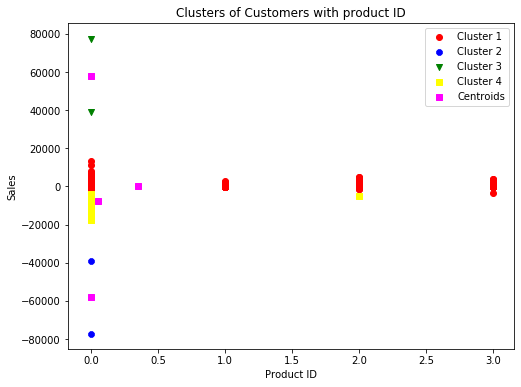

In [234]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],c='red', label='Cluster 1',marker='o')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],c='blue', label='Cluster 2',marker='8')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],c='green', label='Cluster 3',marker='v')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1],c='yellow', label='Cluster 4',marker='s')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c='magenta',label='Centroids',marker='s')
plt.title('Clusters of Customers with product ID')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Across all the product categories, the sale value per order was not high, except for few orders of Product Category 0 , which had both high sale value and again those products were returned later.

In [235]:
## There are 4 clusters, as per the ProductId - 0,1,2,3 ,Product Id 0 max products are sold at bare minimum price i.e it does not generate 
## enough revenue. The prices of such products are close to 0 and Sale median is also close to 0-10K, few products of ProductId 0
## are sold at very high value and equal no are retrn orders/Fees levied

## Product Id 1,2,3 are similar except that these products neither have high sale nor negative sales but close to +10K ~ -10K sales


In [236]:
df[df['Product']==0]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,0
7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,United Kingdom,11.10,2010-12-01 08:28:00,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.0,United Kingdom,11.10,2010-12-01 08:28:00,0
...,...,...,...,...,...,...,...,...,...,...,...
537108,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France,10.20,2011-12-09 12:50:00,0
537109,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France,12.60,2011-12-09 12:50:00,0
537110,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France,16.60,2011-12-09 12:50:00,0
537111,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France,16.60,2011-12-09 12:50:00,0


In [237]:
df[df['Product']==0].groupby('Product')['Sales'].mean().sort_values(ascending=False)

Product
0    17.486293
Name: Sales, dtype: float64

In [238]:
df[(df['Product']==0) & (df['Sales']>60000)].groupby('Product')['Sales'].mean().sort_values(ascending=False)

Product
0    77183.6
Name: Sales, dtype: float64

In [239]:
df[(df['Product']==0) & (df['Sales']<-50000)].groupby('Product')['Sales'].mean().sort_values(ascending=False)

Product
0   -77183.6
Name: Sales, dtype: float64

In [240]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [241]:
## Using One Hot Encoding Label Encoder

In [242]:
from sklearn.preprocessing import LabelEncoder

In [243]:
le =LabelEncoder()

In [244]:
df['Country_code']=le.fit_transform(df['Country'])

In [245]:
df.head(3)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,2,36
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,3,36
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,0,36


In [246]:
df['Country_code'].unique()

array([36, 13,  0, 24, 14, 25, 10, 33, 31, 26, 27, 19,  3, 22, 20, 17,  6,
        9,  7, 32,  1, 18, 12,  2, 15, 16, 30, 21, 35, 29,  8,  5, 37,  4,
       34, 11, 23, 28], dtype=int64)

In [247]:
X=df[['Country_code','Sales']]

In [248]:
X=X.values

In [249]:
wcss = []
for i in range(1,7):
    km = KMeans(n_clusters=i,init='k-means++', n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

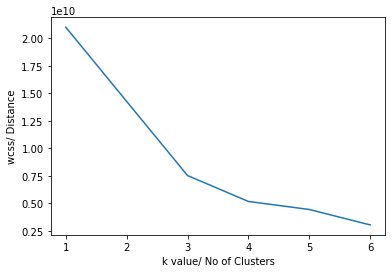

In [250]:
plt.plot(range(1,7),wcss)
plt.xlabel('k value/ No of Clusters')
plt.ylabel('wcss/ Distance')
plt.show()

## Again 4 clusters present

In [251]:
km = KMeans(n_clusters=4,init='k-means++', n_init=10,max_iter=300,random_state=0)

In [252]:
y_pred =km.fit_predict(X)

In [253]:
set(km.labels_)

{0, 1, 2, 3}

In [254]:
df['Country_labels']=km.labels_

In [255]:
X=df[['Country_labels','Sales']].values

In [256]:
wcss = []
for i in range(1,7):
    km = KMeans(n_clusters=i,init='k-means++', n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

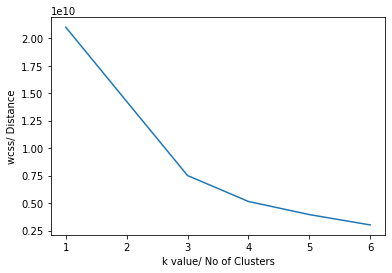

In [257]:
plt.plot(range(1,7),wcss)
plt.xlabel('k value/ No of Clusters')
plt.ylabel('wcss/ Distance')
plt.show()

In [258]:
km = KMeans(n_clusters=4,init='k-means++', n_init=10,max_iter=300,random_state=0)

In [259]:
km.n_clusters

4

In [260]:
y_pred =km.fit_predict(X)

In [261]:
km.cluster_centers_

array([[ 1.94034242e-15,  1.86238098e+01],
       [ 1.00000000e+00, -5.80768000e+04],
       [ 2.00000000e+00,  5.80768000e+04],
       [ 3.00000000e+00, -7.75936231e+03]])

In [262]:
df.head(2)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code,Country_labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,2,36,0
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,3,36,0


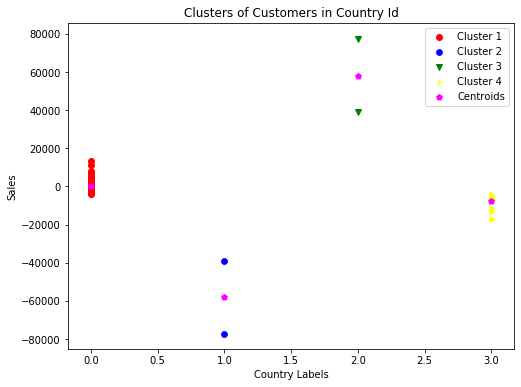

In [263]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],c='red', label='Cluster 1',marker='o')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],c='blue', label='Cluster 2',marker='8')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],c='green', label='Cluster 3',marker='v')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1],c='yellow', label='Cluster 4',marker='4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c='magenta',label='Centroids',marker='p')
plt.title('Clusters of Customers in Country Id')
plt.xlabel('Country Labels')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [264]:
## Again there are 4 clusters based on the Country the products were sold to

In [265]:
## Cluster with maximum sale range with most products sold but sale value is less (+15K to -5K)
df[df['Country_labels']==0].head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code,Country_labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,2,36,0
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,3,36,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,0,36,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,0,36,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,2,36,0


In [266]:
## Cluster with highest sale value and sale value is high (+40K to 80K)
df[df['Country_labels']==2]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code,Country_labels
60865,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6,2011-01-18 10:01:00,0,36,2
220256,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,06-10-2011 15:28,649.50,15098.0,United Kingdom,38970.0,2011-06-10 15:28:00,0,36,2


In [267]:
## Cluster with lowest sale value/ return products (-40K to -80K)
df[df['Country_labels']==1]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code,Country_labels
60870,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6,2011-01-18 10:17:00,0,36,1
220257,C556445,M,Manual,-1,06-10-2011 15:31,38970.00,15098.0,United Kingdom,-38970.0,2011-06-10 15:31:00,0,36,1


In [268]:
## Cluster with only fees/negative sales (-40K to -80K)
df[df['Country_labels']==3].head(10)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code,Country_labels
14858,C537630,AMAZONFEE,AMAZON FEE,-1,12-07-2010 15:04,13541.33,99999.0,United Kingdom,-13541.33,2010-12-07 15:04:00,0,36,3
16066,C537644,AMAZONFEE,AMAZON FEE,-1,12-07-2010 15:34,13474.79,99999.0,United Kingdom,-13474.79,2010-12-07 15:34:00,0,36,3
16147,C537647,AMAZONFEE,AMAZON FEE,-1,12-07-2010 15:41,5519.25,99999.0,United Kingdom,-5519.25,2010-12-07 15:41:00,0,36,3
16190,C537651,AMAZONFEE,AMAZON FEE,-1,12-07-2010 15:49,13541.33,99999.0,United Kingdom,-13541.33,2010-12-07 15:49:00,0,36,3
16191,C537652,AMAZONFEE,AMAZON FEE,-1,12-07-2010 15:51,6706.71,99999.0,United Kingdom,-6706.71,2010-12-07 15:51:00,0,36,3
43259,C540117,AMAZONFEE,AMAZON FEE,-1,01-05-2011 09:55,16888.02,99999.0,United Kingdom,-16888.02,2011-01-05 09:55:00,0,36,3
43260,C540118,AMAZONFEE,AMAZON FEE,-1,01-05-2011 09:57,16453.71,99999.0,United Kingdom,-16453.71,2011-01-05 09:57:00,0,36,3
95698,C544587,AMAZONFEE,AMAZON FEE,-1,2/21/2011 15:07,5575.28,99999.0,United Kingdom,-5575.28,2011-02-21 15:07:00,0,36,3
95699,C544589,AMAZONFEE,AMAZON FEE,-1,2/21/2011 15:11,5258.77,99999.0,United Kingdom,-5258.77,2011-02-21 15:11:00,0,36,3
123286,C546987,AMAZONFEE,AMAZON FEE,-1,3/18/2011 12:56,5693.05,99999.0,United Kingdom,-5693.05,2011-03-18 12:56:00,0,36,3


In [269]:
df.head(2)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code,Country_labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,2,36,0
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,3,36,0


## Now the last clustering based on Date to identify the sales pattern based on time i.e how recently or how early the customers had shopped

In [270]:
df['new_Invoice_Date'].max()

Timestamp('2011-12-09 12:50:00')

In [271]:
df['Invoice_Date'] = df['new_Invoice_Date'].dt.date

In [272]:
df['new_Invoice_Date'].max()

Timestamp('2011-12-09 12:50:00')

In [273]:
df['Invoice_Date'].max() - df['Invoice_Date'][0]

datetime.timedelta(days=373)

In [274]:
df['Days elapsed'] = df['Invoice_Date'].max() - df['Invoice_Date']

In [275]:
df['Days elapsed'][0]

Timedelta('373 days 00:00:00')

In [276]:
df['Days elapsed']= pd.to_numeric(df['Days elapsed'].dt.days, downcast='integer')

In [277]:
df.head(2)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Sales,new_Invoice_Date,Product,Country_code,Country_labels,Days elapsed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,2,36,0,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,3,36,0,373


In [278]:
X=df[['Days elapsed','Sales']]

In [279]:
X= X.values

In [280]:
wcss = []
for i in range(1,7):
    km = KMeans(n_clusters=i,init='k-means++', n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

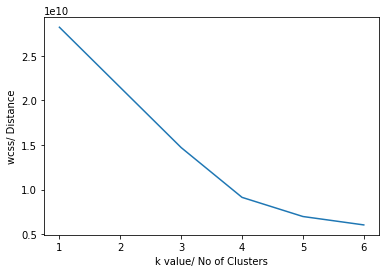

In [281]:
plt.plot(range(1,7),wcss)
plt.xlabel('k value/ No of Clusters')
plt.ylabel('wcss/ Distance')
plt.show()

In [282]:
km = KMeans(n_clusters=5,init='k-means++', n_init=10,max_iter=300,random_state=0)

In [283]:
y_pred = km.fit_predict(X)

In [284]:
km.cluster_centers_

array([[ 2.76138435e+02,  1.86648287e+01],
       [ 6.99609188e+01,  1.85665523e+01],
       [ 2.53500000e+02,  5.80768000e+04],
       [ 3.25000000e+02, -7.71836000e+04],
       [ 1.86763158e+02, -8.77232053e+03]])

In [285]:
set(y_pred)

{0, 1, 2, 3, 4}

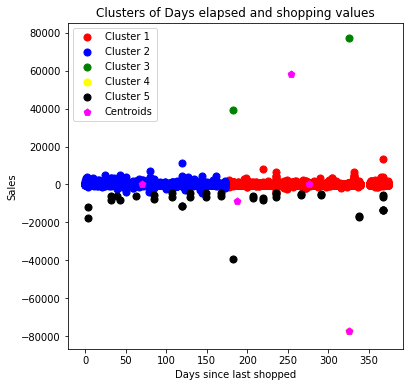

In [286]:
plt.figure(figsize=(6,6))
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],s=50, c='red', label='Cluster 1',marker='o')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],s=50,c='blue', label='Cluster 2',marker='o')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],s=50,c='green', label='Cluster 3',marker='o')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1],s=50,c='yellow', label='Cluster 4',marker='o')
plt.scatter(X[y_pred == 4,0], X[y_pred == 4,1],s=50,c='black', label='Cluster 5',marker='o')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=50,c='magenta',label='Centroids',marker='p')
plt.title('Clusters of Days elapsed and shopping values')
plt.xlabel('Days since last shopped')
plt.ylabel('Sales')
plt.legend()
plt.show()

## As we can see there are primarily 3 main clusters , one who had shopped recently within 5 months and next who shopped 5 months ago. In both cases the values of Sale was not more
## Also there are negative sales/returns throughout the year, i,e for each order few charges were levied or products returned.
## There are Sale size of higher value but onlyvery few orders, also same for negative orders 

## So we can conclude that primarily based on Days Elapsed, Sale Value, Product Descriptions and Country of Sale , there are mainly 5 types of Customers


### 1) Customers were primarily of UK, but the sale value was not much, but they bought high quantities and multiple orders i.e also frequent orders and they placed orders recently as well - Regular Customers

### 2) Very few orders where the sale value were high, these were less frequent orders , also they did not shop recently

### 3) Same quantities of high value orders were returned, these were again less frequent return orders.

### 4) Fees/Levies/Returns formed the bulk of the order quantities, though the charges were not levied recently but almost 5 months back

### 5) Fees/Levies/Returns of small Sale values were returned throughout the year. This means that some of the orders were always returned. ABC should minimise those losses to increase the margin/profit.

In [ ]:
## Note - I tried using DBSCAN for clustering however the model was not getting trained due to huge data and was getting haned. 
##Anyways DBSCAN is very computationally high memory required, hence used only K-Means